In [36]:
import pandas as pd
import numpy as np
import datetime
import pytz
from importlib import reload
import darwin
from pathlib import Path
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [37]:
station = 'puertovillamil'
instrument = 'PCP_tot_bucket'
experiment = 'MM'
var = 'prcp'
aggregation = 'd'
start = "2022-03-28"
end = "2022-12-30"

In [38]:
reload(darwin)
folder = "/home/ben/data/darwin_measured/"
garpath = Path('/home/ben/data/GAR/')
stations = {
    "Santa Rosa": "09_AWS-PSantaRosa_data.csv",
    "Cerro Crocker": "11_AWS-PCerroCrocker_data.csv",
    "Sierra Negra": "14_AWS-PSierraNegra_data.csv",
    "Cueva de Sucre": "16_AWS-PCuevadeSucre_data.csv",
    "La Galapaguera": "18_AWS-PLaGalapaguera_data.csv",
    "El Junco": "20_AWS-PElJunco_data.csv",
    "Puerto Baquerizo Moreno": "22_AWS-PPuertoBaquerizoMoreno_data.csv",
    "Puerto Villamil": "24_AWS-PPuertoVillamil_data.csv",
    "Puerto Ayora": "26_AWS-PPuertoAyora_data.csv",
    "Military": "28_AWS-PMilitar_data.csv",
    "Minas Rojas": "30_AWS-PMinasRojas_data.csv",
}
stations_trans = {
    "crocker": "Cerro Crocker",
    "puertovillamil": "Puerto Villamil",
}
datasets = {}
paths = {
    # 'tropical': f'rc_trop_ls_tutorial_stations_h_2d_{var}_2022.csv',
    # 'Kain-Fritsch (KF)': f'rc_trop_ls_KF_stations_h_2d_{var}_2022.csv',
    # 'KF with kfeta-trigger': f'rc_trop_ls_KF_kfeta-trigger_stations_h_2d_{var}_2022.csv',
    # 'KF Cumulus Potential': f'rc_trop_ls_KFCuP_stations_h_2d_{var}_2022.csv',
    'Grell 3D': f'rc_trop_ls_G3D_stations_d_2d_{var}_2022.csv',
    'Thompson': f'rc_trop_ls_TG_stations_d_2d_{var}_2022.csv',
    'MYNN': f'rc_trop_ls_MYNN_stations_d_2d_{var}_2022.csv',
    'MYNN-TG': f'rc_trop_ls_MYNN-TG_stations_d_2d_{var}_2022.csv',
    'KF-TG': f'rc_trop_ls_KF-TG_stations_d_2d_{var}_2022.csv',
    'KF-TG-MM5': f'rc_trop_ls_KF-TG-bpl_stations_d_2d_{var}_2022.csv',
    'MM': f'rc_trop_ls_MM_stations_{aggregation}_2d_{var}_2022.csv',
    # 'tropical (early)': f'rc_trop_ls_vert43/rc_trop_ls_vert43_d02km_d_2d_{var}_2022.csv',
}

In [39]:
wrf = pd.read_csv(f"/home/ben/projects/darwin/{paths[experiment]}")
wrf.index = pd.DatetimeIndex(wrf["datetime"], tz=datetime.timezone.utc)
wrf.drop("datetime", axis=1, inplace=True)
wrf = wrf.loc[start:end] * 24

mf = darwin.open_measurements(folder + stations[stations_trans[station]])
mf = mf.loc[start: end].resample("D").sum()

In [40]:
mf

,T,RH,SLR,WS,WD,PCP_tot_bucket,PCP_acoustic,ST,Vwc
datetime,,,,,,,,,
2022-03-28 00:00:00+00:00,3999.14,12355.99,33568.679,0.000,0.0,0.0,0.0,4742.63,6.841
2022-03-29 00:00:00+00:00,3907.84,12925.50,28694.119,0.000,0.0,0.0,0.0,4764.78,6.554
2022-03-30 00:00:00+00:00,3902.01,12973.66,34527.496,0.000,0.0,0.0,0.0,4832.51,6.435
2022-03-31 00:00:00+00:00,3536.65,14268.70,11241.076,0.000,0.0,9.6,0.0,4359.54,6.633
2022-04-01 00:00:00+00:00,3785.42,13318.31,40768.870,0.000,0.0,1.0,0.0,4341.22,6.938
...,...,...,...,...,...,...,...,...,...
2022-10-15 00:00:00+00:00,2908.28,13024.76,31019.377,186.583,25523.6,0.4,0.0,3945.24,1.332
2022-10-16 00:00:00+00:00,2899.40,12335.36,18297.323,202.613,25751.5,0.2,0.0,3882.77,1.289
2022-10-17 00:00:00+00:00,3013.17,11240.82,30830.419,208.047,26412.0,0.0,0.0,3937.67,1.266


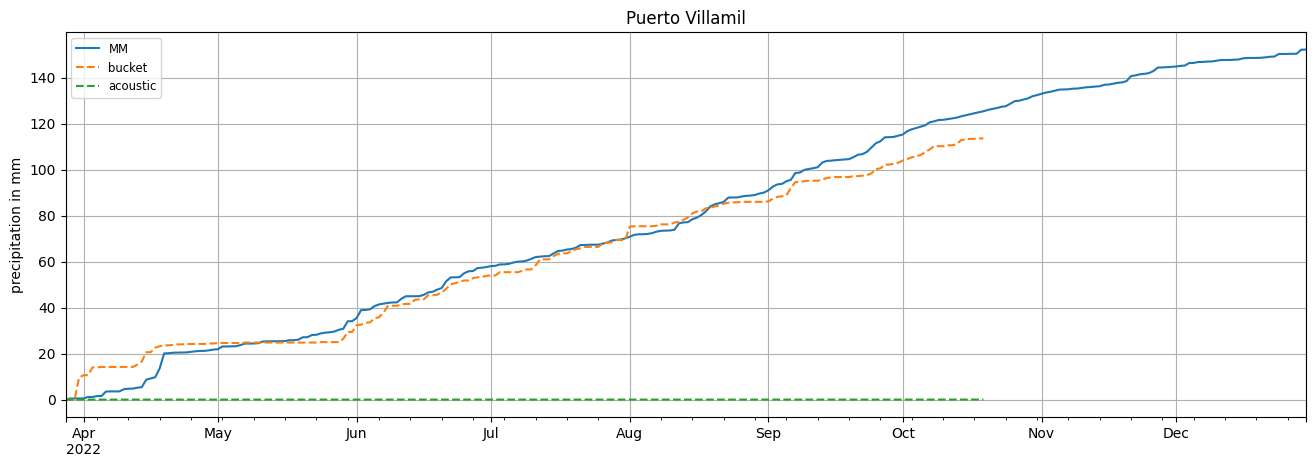

In [67]:
reload(darwin)

fig, ax = plt.subplots(figsize=(16, 5), sharex=True, sharey=True, )
wrf[station].cumsum().plot(ax=ax, label=experiment)
mf["PCP_tot_bucket"].cumsum().plot(ax=ax, label="bucket", style="--")
mf["PCP_acoustic"].cumsum().plot(ax=ax, label="acoustic", style="--")
ax.set_title(stations_trans[station])
ax.set_xlabel("")
ax.set_ylabel("precipitation in mm")
plt.legend(fontsize='small')
plt.grid()
plt.savefig(f"comparison_{var}_{station}_cumsum.png")
plt.show()

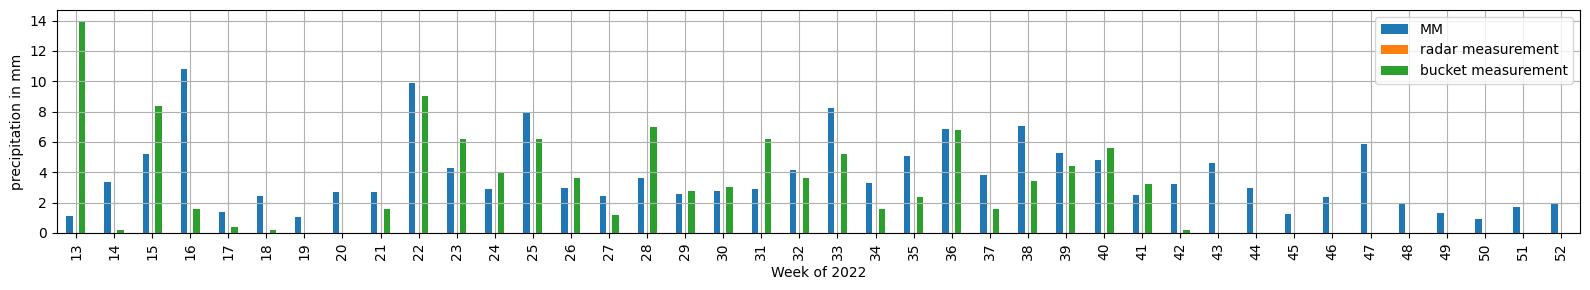

In [66]:
reload(darwin)

to_plot = pd.DataFrame({
    'MM': wrf[station],
    'radar measurement': np.nan,
    'bucket measurement': mf["PCP_tot_bucket"],
    # 'acoustic measurement': mf["PCP_acoustic"],
})
to_plot_weekly = to_plot.loc[start:end].resample("w").sum()
to_plot_weekly.index = pd.Index(np.arange(13,53))
fig, ax = plt.subplots(figsize=(16,3))
to_plot_weekly.plot(kind='bar', ax=ax, y=['MM', 'radar measurement', 'bucket measurement'])
# ax.set_title(stations_trans[station])
ax.set_xlabel("Week of 2022")
ax.set_ylabel("precipitation in mm")
plt.grid()
plt.tight_layout()
plt.savefig(f"comparison_prcp_{station}_weekly.png")
plt.show()

In [60]:
print(plt.color_sequences['Set1'][2])

(0.30196078431372547, 0.6862745098039216, 0.2901960784313726)


<AxesSubplot: xlabel='datetime'>

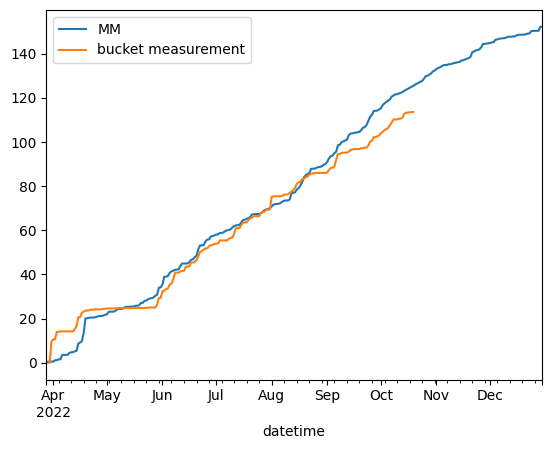

In [44]:
to_plot.cumsum().plot(kind='line',)

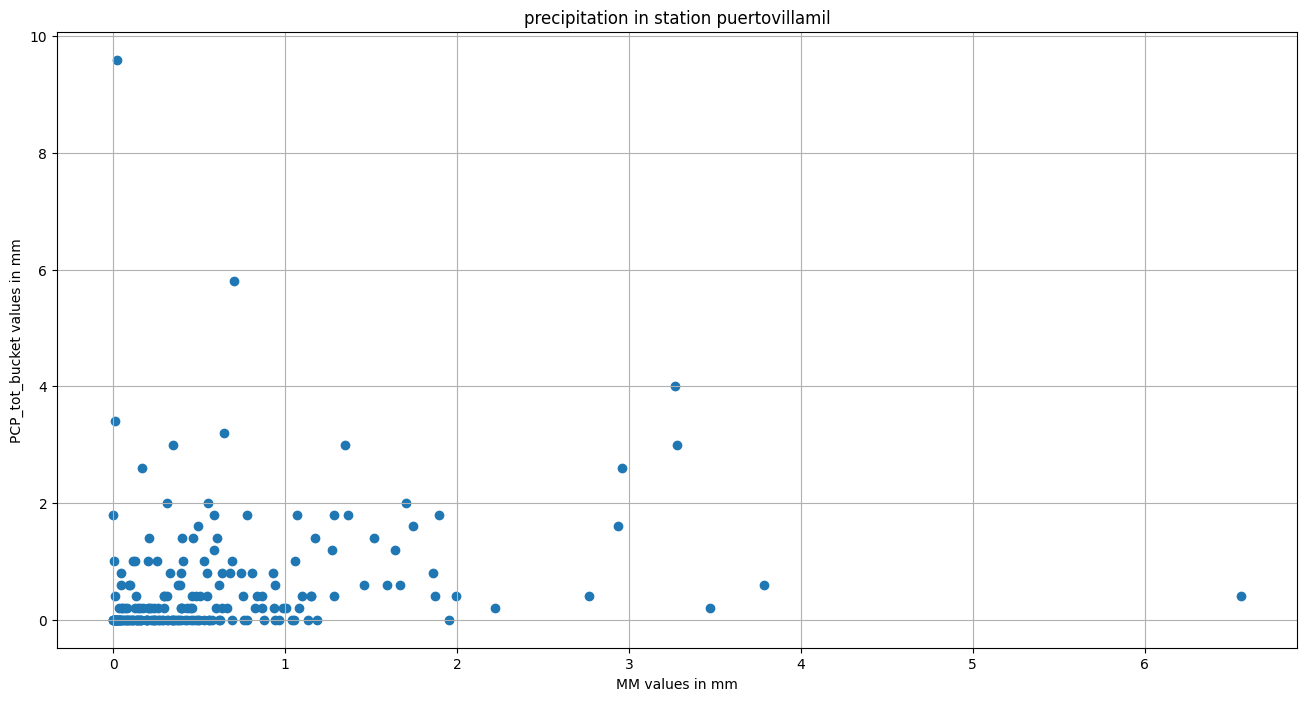

In [45]:
reload(darwin)
fig, ax = plt.subplots(figsize=(16,8), sharex=True, sharey=True, )
ax.scatter(to_plot[experiment], to_plot['bucket measurement'])
ax.set_title('precipitation in station ' + station)
ax.set_xlabel(experiment + " values in mm")
ax.set_ylabel(instrument + " values in mm")
# plt.legend(fontsize='small')
plt.grid()
# plt.savefig(f"comparison_{var}_{key}_station.png")
plt.show()

In [46]:
to_plot.plot(kind='')

ValueError:  is not a valid plot kind

In [87]:
mf['PCP_diff_radar'].loc[start:end]

datetime
2022-03-27 00:00:00+00:00    40.00
2022-03-28 00:00:00+00:00     0.00
2022-03-29 00:00:00+00:00    33.42
2022-03-30 00:00:00+00:00     0.00
2022-03-31 00:00:00+00:00    12.12
                             ...  
2022-10-02 00:00:00+00:00     0.00
2022-10-03 00:00:00+00:00     0.00
2022-10-04 00:00:00+00:00     0.00
2022-10-05 00:00:00+00:00     0.00
2022-10-06 00:00:00+00:00     0.00
Freq: D, Name: PCP_diff_radar, Length: 194, dtype: float64

In [89]:
datasets['MM']['crocker'].loc[start: end]

datetime
2022-03-27 00:00:00+00:00     0.367632
2022-03-28 00:00:00+00:00     0.416304
2022-03-29 00:00:00+00:00     1.005720
2022-03-30 00:00:00+00:00    10.170720
2022-03-31 00:00:00+00:00    79.778400
                               ...    
2022-10-02 00:00:00+00:00     2.796000
2022-10-03 00:00:00+00:00     0.844464
2022-10-04 00:00:00+00:00     2.176368
2022-10-05 00:00:00+00:00     1.097712
2022-10-06 00:00:00+00:00     1.816224
Name: crocker, Length: 194, dtype: float64